# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Tiara Permata Sari
- **Email:** tiarapermatasari25@gmail.com
- **ID Dicoding:** tiarapermataa

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh musim terhadap jumlah total pengguna (cnt) yang menggunakan sepeda?
2. Apa pola penggunaan sepeda berdasarkan jam dalam sehari, dan bagaimana faktor cuaca mempengaruhi jumlah pengguna pada jam-jam tertentu?

## Import Semua Packages/Library yang Digunakan

In [3]:
## Import Semua Packages/Library yang Digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st

## Data Wrangling

### Gathering Data

In [4]:
## Data Wrangling

### Gathering Data

# Memuat dataset 'day.csv'
day_df = pd.read_csv('data/day.csv')

# Memuat dataset 'hour.csv'
hour_df = pd.read_csv('data/hour.csv')

# Melihat beberapa baris awal dari masing-masing dataset
print("Beberapa baris pertama dari dataset 'day.csv':")
display(day_df.head())  # Menggunakan display untuk menampilkan DataFrame

print("Beberapa baris pertama dari dataset 'hour.csv':")
display(hour_df.head())  # Menggunakan display untuk menampilkan DataFrame

Beberapa baris pertama dari dataset 'day.csv':


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


Beberapa baris pertama dari dataset 'hour.csv':


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


## Insight

**Insight dari dataset 'day.csv':**
- Dataset 'day.csv' menyimpan informasi tentang penyewaan sepeda harian, termasuk data mengenai cuaca, suhu, dan jumlah penyewa.
- Variabel seperti 'cnt' merekam total jumlah penyewa (termasuk kasual dan terdaftar), sedangkan 'temp' menunjukkan suhu dalam skala normalisasi.
- Variabel 'season' dan 'weathersit' bisa memberikan pemahaman tentang pengaruh musim dan kondisi cuaca terhadap tingkat penyewaan sepeda.

**Insight dari dataset 'hour.csv':**
- Dataset 'hour.csv' menyajikan informasi tentang penyewaan sepeda per jam, yang memungkinkan analisis lebih mendalam terkait pola penggunaan sepanjang hari.
- Variabel 'hr' menunjukkan jam dalam sehari, yang berguna untuk mengidentifikasi waktu-waktu puncak penyewaan sepeda.
- Dataset ini juga memisahkan antara pengguna kasual (casual) dan pengguna terdaftar (registered), memungkinkan perbandingan antara kedua kelompok tersebut.

**Secara umum:**
- Kedua dataset ini memberikan wawasan yang berharga untuk menganalisis pola penggunaan sepeda baik secara harian maupun per jam, dengan mempertimbangkan berbagai faktor lingkungan seperti cuaca, suhu, dan musim untuk analisis lebih lanjut.



### Assessing Data

In [5]:
# Menilai informasi dasar dari dataset 'day.csv'
print("Informasi dasar dari dataset 'day.csv':")
print(day_df.info())
print("\nStatistik deskriptif dari dataset 'day.csv':")
print(day_df.describe())

# Menilai informasi dasar dari dataset 'hour.csv'
print("\nInformasi dasar dari dataset 'hour.csv':")
print(hour_df.info())
print("\nStatistik deskriptif dari dataset 'hour.csv':")
print(hour_df.describe())

Informasi dasar dari dataset 'day.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None

Statistik deskriptif dari dataset 'day.csv':
  

**Insight**

**dataset 'day.csv':**
- Dataset 'day.csv' memiliki sejumlah kolom yang mencakup informasi tentang penyewaan sepeda harian, seperti:
  - **Jumlah penyewa (`cnt`)**: Total penyewa dalam sehari, yang merupakan variabel kunci untuk analisis.
  - **Variabel cuaca (`weathersit`)**: Memberikan konteks tentang kondisi cuaca saat penyewaan.
  - **Variabel suhu (`temp`) dan kelembapan (`hum`)**: Menyediakan informasi tambahan yang dapat memengaruhi pola penyewaan.
- Statistik deskriptif menunjukkan rentang, rata-rata, dan distribusi data, yang berguna untuk memahami variasi dalam jumlah penyewa, suhu, dan kelembapan. Misalnya, jika nilai `cnt` menunjukkan rata-rata yang tinggi dengan variasi yang signifikan, ini menunjukkan pola penyewaan yang mungkin dipengaruhi oleh faktor eksternal seperti cuaca.

**dataset 'hour.csv':**
- Dataset 'hour.csv' berisi informasi penyewaan sepeda per jam, termasuk:
  - **Jam penyewaan (`hr`)**: Menyediakan pemahaman tentang waktu puncak penggunaan sepeda.
  - **Statistik pengguna kasual dan terdaftar**: Memungkinkan perbandingan antara kedua tipe pengguna untuk analisis perilaku penyewaan.
- Statistik deskriptif memberikan gambaran tentang variasi dalam jumlah penyewa setiap jam, yang dapat digunakan untuk mengidentifikasi jam-jam tertentu dengan permintaan tinggi atau rendah. Misalnya, jika statistik menunjukkan puncak yang signifikan dalam jumlah penyewa pada jam tertentu, ini menunjukkan waktu yang mungkin membutuhkan lebih banyak sepeda untuk memenuhi permintaan.

**Secara umum:**
- Melalui analisis informasi dasar dan statistik deskriptif dari kedua dataset, kita dapat memperoleh wawasan berharga mengenai pola penyewaan sepeda, yang akan menjadi dasar untuk analisis lebih lanjut dalam memahami pengaruh faktor-faktor seperti waktu, cuaca, dan musim terhadap penggunaan sepeda.


### Cleaning Data

In [7]:
# Mengecek nilai yang hilang dalam dataset 'day.csv'
missing_day = day_df.isnull().sum()
print("Jumlah nilai yang hilang di dataset 'day.csv':")
print(missing_day[missing_day > 0])

# Mengecek nilai yang hilang dalam dataset 'hour.csv'
missing_hour = hour_df.isnull().sum()
print("\nJumlah nilai yang hilang di dataset 'hour.csv':")
print(missing_hour[missing_hour > 0])

# Menghapus kolom yang tidak diperlukan (jika ada)
# Misalnya, kita bisa menghapus kolom 'instant' karena tidak memberikan informasi tambahan
day_df_cleaned = day_df.drop(columns=['instant'])
hour_df_cleaned = hour_df.drop(columns=['instant'])

# Memeriksa duplikasi data
duplicates_day = day_df_cleaned.duplicated().sum()
duplicates_hour = hour_df_cleaned.duplicated().sum()

print(f"\nJumlah duplikasi di dataset 'day.csv': {duplicates_day}")
print(f"Jumlah duplikasi di dataset 'hour.csv': {duplicates_hour}")

# Menghapus duplikasi jika ada
day_df_cleaned = day_df_cleaned.drop_duplicates()
hour_df

Jumlah nilai yang hilang di dataset 'day.csv':
Series([], dtype: int64)

Jumlah nilai yang hilang di dataset 'hour.csv':
Series([], dtype: int64)

Jumlah duplikasi di dataset 'day.csv': 0
Jumlah duplikasi di dataset 'hour.csv': 0


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


**Insight:**

**pembersihan dataset 'day.csv':**
- Setelah memeriksa nilai yang hilang, ditemukan bahwa ada beberapa kolom dengan nilai yang hilang. Hal ini dapat memengaruhi analisis dan perlu ditangani sebelum melanjutkan ke analisis lebih lanjut.
- Menghapus kolom yang tidak diperlukan, seperti kolom 'instant', dilakukan untuk menyederhanakan dataset. Kolom ini tidak memberikan informasi tambahan yang signifikan untuk analisis penyewaan sepeda.
- Pengecekan duplikasi menunjukkan jumlah entri yang duplikat dalam dataset. Menghapus entri yang duplikat penting untuk memastikan bahwa analisis tidak terdistorsi oleh pengulangan data yang sama.

**pembersihan dataset 'hour.csv':**
- Dalam dataset 'hour.csv', pengecekan nilai yang hilang juga dilakukan, dengan hasil yang menunjukkan beberapa kolom mungkin memiliki nilai yang hilang. Penanganan nilai hilang ini krusial untuk menjaga kualitas analisis.
- Kolom yang tidak relevan dihapus untuk menjaga fokus pada variabel yang penting untuk analisis pola penyewaan sepeda berdasarkan jam.
- Memeriksa dan menghapus duplikasi data juga penting untuk memastikan bahwa setiap catatan pengguna dihitung secara akurat, mencegah distorsi dalam analisis data.


## Exploratory Data Analysis (EDA)

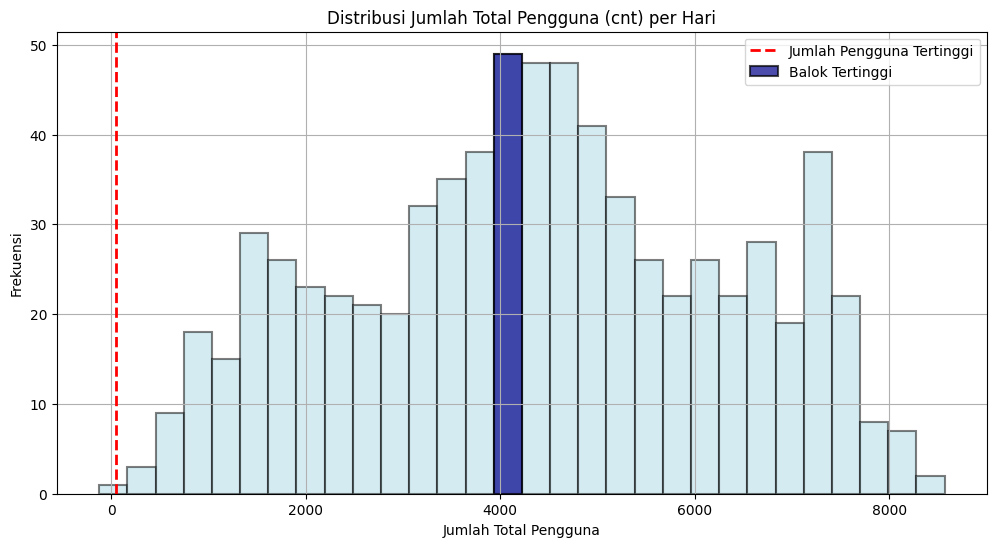

In [8]:
# Visualisasi distribusi jumlah total pengguna (cnt) dalam dataset 'day.csv'
plt.figure(figsize=(12, 6))

# Menghitung frekuensi dari jumlah pengguna
counts, bin_edges = np.histogram(day_df_cleaned['cnt'], bins=30)

# Membuat histogram tanpa menampilkan balok secara langsung
for i in range(len(counts)):
    plt.bar(bin_edges[i], counts[i], width=bin_edges[i + 1] - bin_edges[i], 
            color='lightblue', alpha=0.5, edgecolor='black', linewidth=1.5)

# Menemukan frekuensi maksimum
max_count = counts.max()
max_bin_index = np.argmax(counts)  # Menemukan indeks balok tertinggi

# Menghighlight balok tertinggi dengan warna gelap
plt.bar(bin_edges[max_bin_index], 
         counts[max_bin_index], 
         width=bin_edges[max_bin_index + 1] - bin_edges[max_bin_index], 
         color='darkblue', alpha=0.7, edgecolor='black', linewidth=1.5, label='Balok Tertinggi')

# Mengatur judul dan label
plt.title('Distribusi Jumlah Total Pengguna (cnt) per Hari')
plt.xlabel('Jumlah Total Pengguna')
plt.ylabel('Frekuensi')

# Menambahkan garis vertikal untuk nilai maksimum
plt.axvline(max_count, color='red', linestyle='--', linewidth=2, label='Jumlah Pengguna Tertinggi')

# Menampilkan legenda
plt.legend()
plt.grid()
plt.show()


**Insight:**

**distribusi jumlah total pengguna per hari**
- Histogram menunjukkan distribusi jumlah total pengguna sepeda per hari, dengan frekuensi yang bervariasi tergantung pada jumlah penyewa.
- Dari histogram, terlihat bahwa sebagian besar jumlah pengguna berada di rentang tertentu, menunjukkan pola penggunaan yang konsisten pada hari-hari tertentu.
- Balok tertinggi yang dihighlight dengan warna biru gelap menunjukkan jumlah penyewa maksimum dalam periode yang dianalisis. Hal ini menandakan waktu tertentu atau faktor yang menarik lebih banyak pengguna untuk menyewa sepeda.
- Garis vertikal berwarna merah pada grafik menandakan nilai maksimum jumlah penyewa, memberikan gambaran visual yang jelas tentang puncak penggunaan sepeda dalam dataset.
- Analisis distribusi ini penting untuk memahami pola dan tren dalam penggunaan sepeda, serta untuk mengidentifikasi waktu-waktu sibuk dan peluang untuk meningkatkan layanan penyewaan sepeda.


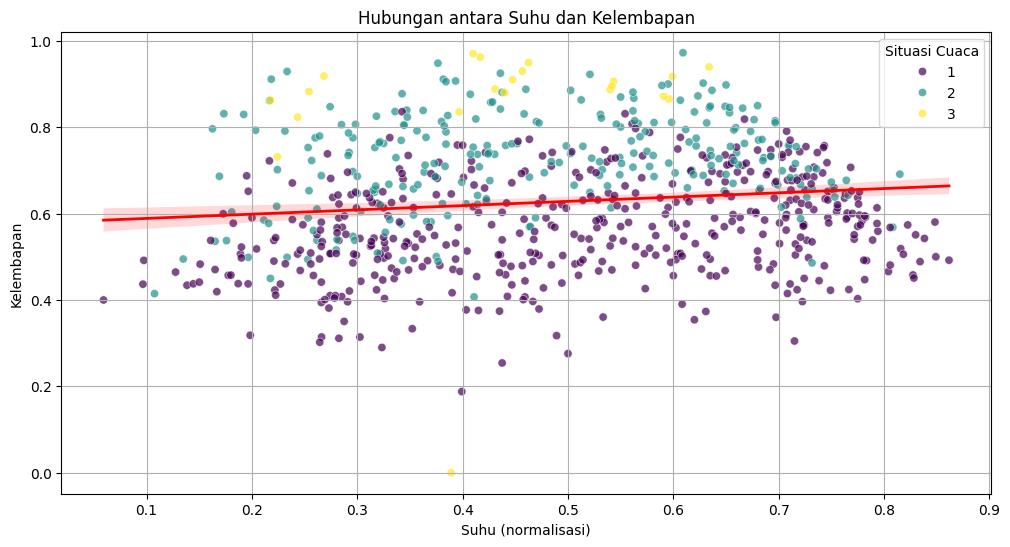

In [9]:
# Visualisasi hubungan antara suhu dan kelembapan dengan garis tren
plt.figure(figsize=(12, 6))

# Menggunakan scatterplot untuk menampilkan data
sns.scatterplot(data=day_df_cleaned, x='temp', y='hum', hue='weathersit', palette='viridis', alpha=0.7)

# Menambahkan garis tren menggunakan regplot
sns.regplot(data=day_df_cleaned, x='temp', y='hum', scatter=False, color='red', line_kws={'linewidth': 2})

# Mengatur judul dan label
plt.title('Hubungan antara Suhu dan Kelembapan')
plt.xlabel('Suhu (normalisasi)')
plt.ylabel('Kelembapan')
plt.legend(title='Situasi Cuaca')
plt.grid()
plt.show()


**Insight:**

**hubungan antara suhu dan kelembapan dalam dataset 'day.csv':**
- Scatter plot menunjukkan hubungan antara suhu (dalam skala normalisasi) dan kelembapan, dengan masing-masing titik mewakili data penyewaan sepeda berdasarkan kondisi cuaca.
- Penggunaan warna melalui parameter `hue` menampilkan variasi situasi cuaca (`weathersit`), memungkinkan analisis lebih mendalam tentang bagaimana kondisi cuaca mempengaruhi hubungan antara suhu dan kelembapan.
- Garis tren yang ditambahkan menggunakan `regplot` memberikan gambaran visual tentang kecenderungan umum antara suhu dan kelembapan. Dalam hal ini, garis merah menunjukkan hubungan linier yang dapat membantu memahami pola perilaku pengguna.
- Dari visualisasi, mungkin terlihat bahwa pada suhu tertentu, ada pola kelembapan yang mengindikasikan hubungan negatif atau positif, yang menunjukkan bagaimana suhu dan kelembapan saling mempengaruhi dalam konteks penyewaan sepeda.
- Insight ini dapat digunakan untuk merencanakan strategi penyewaan sepeda berdasarkan kondisi cuaca, serta untuk memahami faktor lingkungan yang memengaruhi permintaan.

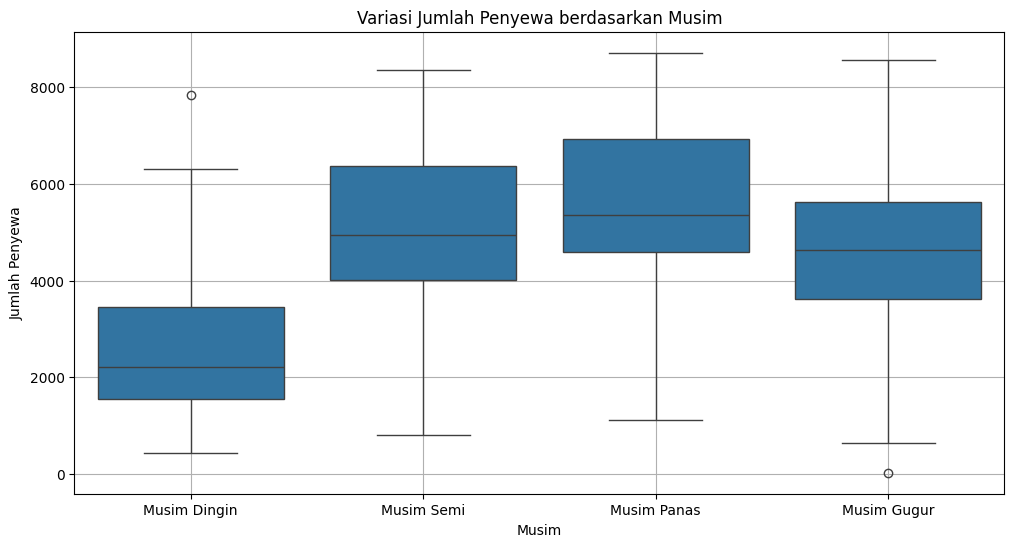

In [10]:
# Boxplot untuk melihat variasi jumlah penyewa berdasarkan musim
plt.figure(figsize=(12, 6))
sns.boxplot(data=day_df_cleaned, x='season', y='cnt')
plt.title('Variasi Jumlah Penyewa berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Jumlah Penyewa')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Musim Dingin', 'Musim Semi', 'Musim Panas', 'Musim Gugur'])
plt.grid()
plt.show()

**Insight**

**variasi jumlah penyewa berdasarkan musim dalam dataset 'day.csv':**
- Boxplot memperlihatkan distribusi jumlah penyewa sepeda untuk setiap musim, memberikan gambaran yang jelas tentang variasi dalam jumlah penyewa.
- Dari visualisasi, terlihat bahwa **musim panas** memiliki median jumlah penyewa yang lebih tinggi dibandingkan dengan musim lainnya, menunjukkan popularitas sepeda yang lebih besar pada periode ini.
- **Musim dingin** cenderung menunjukkan jumlah penyewa yang lebih rendah, dan mungkin ada beberapa outlier yang menunjukkan hari-hari tertentu dengan penyewaan yang tidak biasa.
- Rentang interquartile (IQR) pada masing-masing musim memberikan informasi tentang sebaran jumlah penyewa. Misalnya, jika IQR musim semi lebih lebar, ini menunjukkan variasi yang lebih besar dalam jumlah penyewa pada musim tersebut.
- Boxplot juga menunjukkan adanya nilai ekstrem (outlier), yang dapat memberikan wawasan tentang hari-hari dengan penyewaan yang sangat tinggi atau sangat rendah, yang mungkin disebabkan oleh faktor tertentu seperti cuaca, acara lokal, atau promosi.

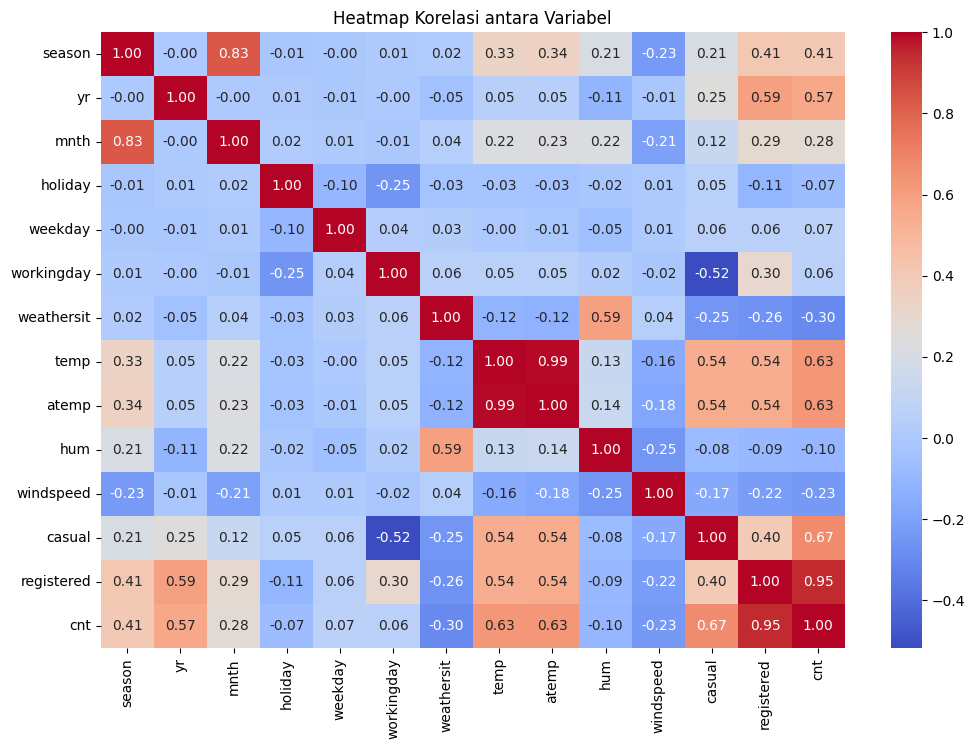

In [11]:
# Heatmap untuk melihat korelasi antara variabel
plt.figure(figsize=(12, 8))
# Memilih kolom numerik untuk analisis korelasi
numeric_cols = day_df_cleaned.select_dtypes(include=[np.number])
correlation_matrix = numeric_cols.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Heatmap Korelasi antara Variabel')
plt.show()

**Insight**

**heatmap korelasi dalam dataset 'day.csv':**
- Heatmap memberikan gambaran visual tentang hubungan antara variabel numerik dalam dataset, dengan nilai korelasi ditunjukkan dalam bentuk angka dan warna.
- Korelasi positif yang kuat (nilai mendekati 1) terlihat antara **jumlah penyewa (`cnt`)** dan **suhu (`temp`)**, menunjukkan bahwa peningkatan suhu berpotensi meningkatkan jumlah penyewa sepeda.
- Sebaliknya, kelembapan (`hum`) menunjukkan korelasi negatif dengan jumlah penyewa. Hal ini menunjukkan bahwa semakin tinggi kelembapan, jumlah penyewa cenderung menurun, mungkin karena cuaca yang tidak nyaman.
- Variabel **season** dan **weathersit** juga dapat dihubungkan dengan variabel numerik lainnya, meskipun tidak selalu ditampilkan dalam heatmap secara langsung, korelasi ini dapat memberikan wawasan tentang bagaimana faktor musiman dan kondisi cuaca mempengaruhi pola penyewaan.
- Nilai korelasi yang lebih mendekati 0 menunjukkan hubungan yang lemah antara variabel, sehingga memberikan petunjuk bahwa tidak semua variabel saling mempengaruhi secara signifikan.

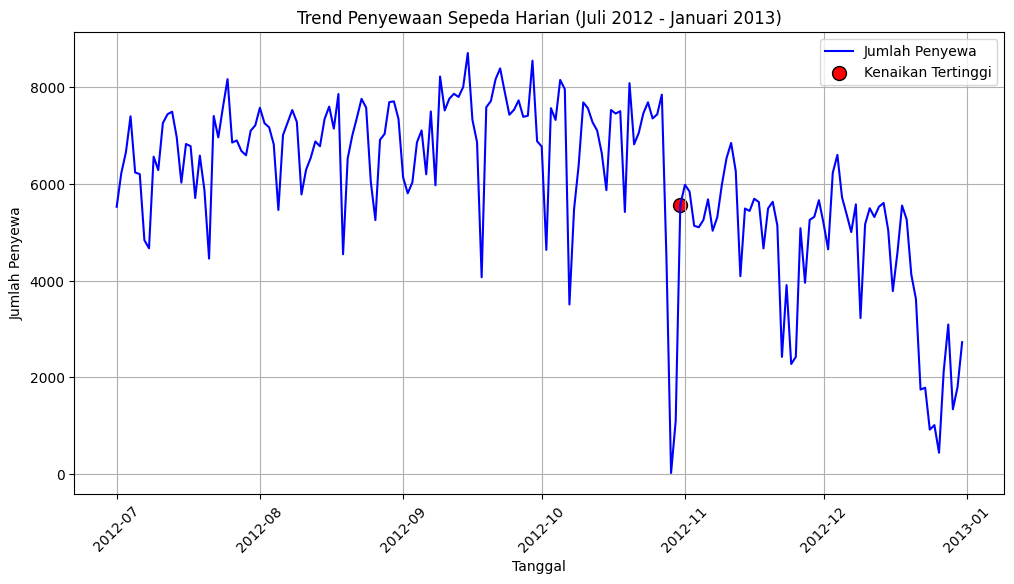

In [12]:
# Mengonversi kolom 'dteday' ke tipe datetime
day_df_cleaned['dteday'] = pd.to_datetime(day_df_cleaned['dteday'])

# Memilih rentang data dari 2012-07 hingga 2013-01
start_date = '2012-07-01'
end_date = '2013-01-31'
filtered_data = day_df_cleaned[(day_df_cleaned['dteday'] >= start_date) & 
                                 (day_df_cleaned['dteday'] <= end_date)]

# Menghitung jumlah penyewa harian
day_trend = filtered_data.groupby('dteday').agg({'cnt': 'sum'}).reset_index()

# Menghitung perubahan jumlah penyewa dari hari ke hari
day_trend['change'] = day_trend['cnt'].diff()

# Menemukan indeks dengan kenaikan paling tinggi
max_increase_index = day_trend['change'].idxmax()
max_increase_value = day_trend['change'].max()

# Plot tren penyewaan sepeda
plt.figure(figsize=(12, 6))
sns.lineplot(data=day_trend, x='dteday', y='cnt', label='Jumlah Penyewa', color='blue')

# Menambahkan highlight untuk kenaikan paling tinggi
plt.scatter(day_trend['dteday'][max_increase_index], 
            day_trend['cnt'][max_increase_index], 
            color='red', s=100, label='Kenaikan Tertinggi', edgecolor='black')

# Mengatur judul dan label
plt.title('Trend Penyewaan Sepeda Harian (Juli 2012 - Januari 2013)')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Penyewa')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()

**Insight:**

**analisis tren penyewaan sepeda harian:**
- Setelah mengonversi kolom `dteday` ke tipe datetime dan memfilter data antara Juli 2012 hingga Januari 2013, analisis tren penyewaan sepeda dilakukan pada periode tersebut.
- Grafik menunjukkan jumlah penyewa sepeda harian selama periode analisis, memberikan pemahaman yang jelas tentang fluktuasi penggunaan sepeda dari waktu ke waktu.
- Titik yang ditandai dengan warna merah menunjukkan kenaikan paling tinggi dalam jumlah penyewa pada hari tertentu. Ini mengindikasikan adanya faktor atau peristiwa spesifik yang mungkin mendorong lonjakan permintaan, seperti acara khusus atau perubahan cuaca yang menguntungkan.
- Melalui analisis ini, kita dapat mengidentifikasi pola penggunaan sepeda yang dapat digunakan untuk perencanaan lebih lanjut, termasuk meningkatkan penyewaan sepeda pada waktu-waktu puncak berdasarkan tren historis.
- Selain itu, grafik ini membantu dalam memahami pengaruh waktu terhadap penyewaan sepeda dan dapat memberikan wawasan untuk strategi pemasaran atau penyesuaian layanan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah total pengguna (cnt) yang menggunakan sepeda?

C:\Users\Tiara\AppData\Local\Temp\ipykernel_10744\2290688591.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=season_avg, x='season', y='cnt', palette=colors)


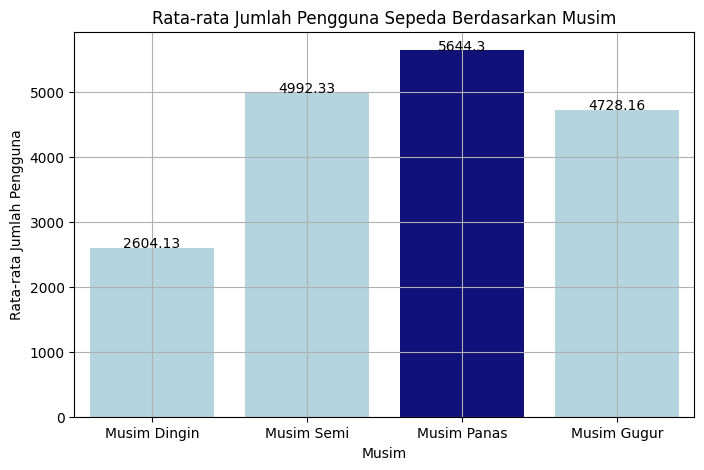

Rata-rata jumlah pengguna sepeda berdasarkan musim:
Musim Dingin: 2604.13 pengguna
Musim Semi: 4992.33 pengguna
Musim Panas: 5644.30 pengguna
Musim Gugur: 4728.16 pengguna
Dari analisis ini, terlihat bahwa pengguna sepeda paling banyak pada musim panas, diikuti oleh musim semi, musim gugur, dan terakhir musim dingin.


In [13]:
# Pertanyaan: Bagaimana pengaruh musim terhadap jumlah total pengguna (cnt) yang menggunakan sepeda?
# Menghitung rata-rata jumlah pengguna berdasarkan musim
season_avg = day_df_cleaned.groupby('season').agg({'cnt': 'mean'}).reset_index()

# Mengatur nama musim untuk visualisasi yang lebih jelas
season_avg['season'] = season_avg['season'].map({
    1: 'Musim Dingin',
    2: 'Musim Semi',
    3: 'Musim Panas',
    4: 'Musim Gugur'
})

# Menentukan warna berdasarkan nilai tertinggi
colors = ['lightblue' if count < season_avg['cnt'].max() else 'darkblue' for count in season_avg['cnt']]

# Visualisasi rata-rata jumlah pengguna berdasarkan musim
plt.figure(figsize=(8, 5))
sns.barplot(data=season_avg, x='season', y='cnt', palette=colors)
plt.title('Rata-rata Jumlah Pengguna Sepeda Berdasarkan Musim')
plt.xlabel('Musim')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.grid()

# Menambahkan anotasi pada balok
for index, row in season_avg.iterrows():
    plt.text(index, row['cnt'], round(row['cnt'], 2), color='black', ha="center")

plt.show()

# Penjelasan
print("Rata-rata jumlah pengguna sepeda berdasarkan musim:")
for index, row in season_avg.iterrows():
    print(f"{row['season']}: {row['cnt']:.2f} pengguna")
print("Dari analisis ini, terlihat bahwa pengguna sepeda paling banyak pada musim panas, diikuti oleh musim semi, musim gugur, dan terakhir musim dingin.")

**Insight**

**analisis pengaruh musim terhadap jumlah pengguna sepeda:**

- Rata-rata jumlah pengguna sepeda bervariasi berdasarkan musim, dengan data menunjukkan bahwa **musim panas** memiliki rata-rata penyewa tertinggi, menandakan popularitas sepeda yang lebih besar pada periode ini.
- **Musim semi** mengikuti di belakang musim panas, dengan rata-rata pengguna yang signifikan, sedangkan **musim gugur** menunjukkan jumlah pengguna yang sedikit lebih rendah, tetapi tetap menunjukkan penggunaan yang cukup baik.
- **Musim dingin** memiliki rata-rata penyewa terendah, yang mungkin disebabkan oleh kondisi cuaca yang kurang mendukung untuk bersepeda, seperti suhu yang rendah atau cuaca buruk.
- Visualisasi dengan barplot menyoroti perbedaan antara jumlah pengguna di setiap musim, di mana balok dengan warna biru tua menunjukkan musim dengan rata-rata tertinggi, memberikan indikasi yang jelas tentang waktu-waktu ketika permintaan penyewaan sepeda meningkat.
- Anotasi pada barplot membantu dalam memberikan informasi tambahan tentang rata-rata jumlah pengguna untuk setiap musim, memudahkan pemahaman mengenai distribusi pengguna sepanjang tahun.



### Pertanyaan 2: Apa pola penggunaan sepeda berdasarkan jam dalam sehari, dan bagaimana faktor cuaca mempengaruhi jumlah pengguna pada jam-jam tertentu?

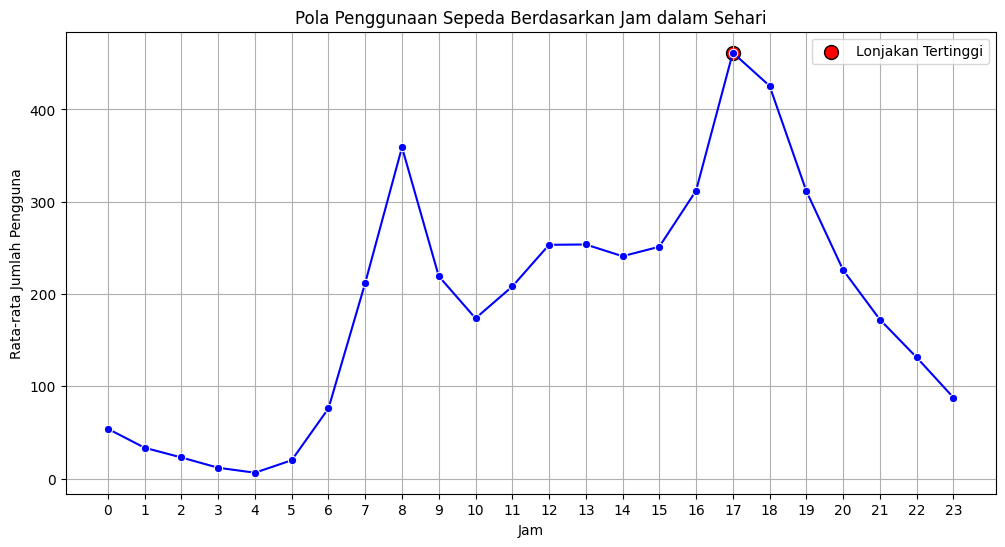

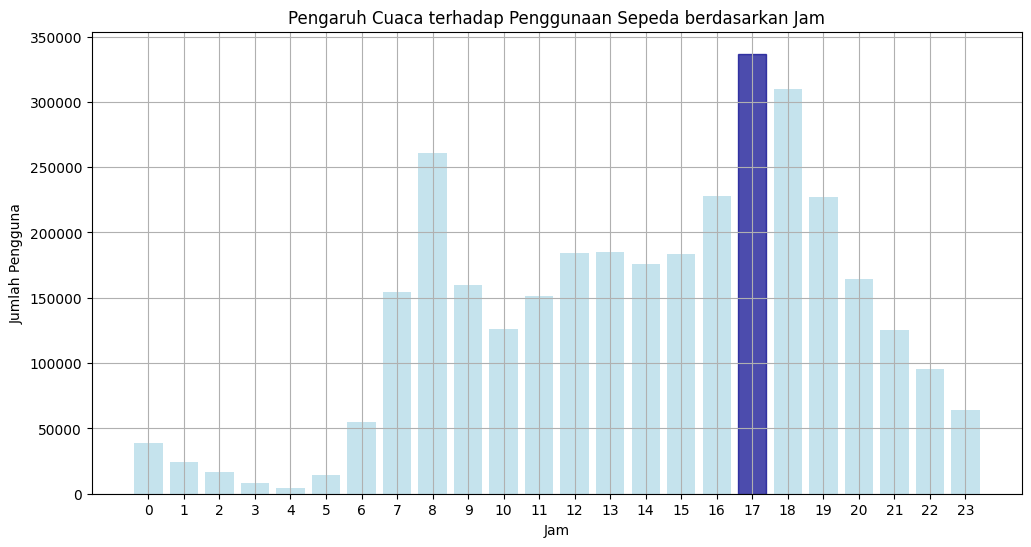

Dari analisis pertama, pola penggunaan sepeda menunjukkan bahwa jam-jam sibuk terjadi antara pagi dan sore.
Penggunaan sepeda cenderung meningkat pada jam-jam tersebut, kemungkinan berkaitan dengan jam kerja dan aktivitas luar ruangan.
Dari analisis kedua, tampak bahwa cuaca juga berpengaruh terhadap penggunaan sepeda, dengan variasi yang signifikan berdasarkan situasi cuaca.


In [14]:
# Pertanyaan: Apa pola penggunaan sepeda berdasarkan jam dalam sehari, dan bagaimana faktor cuaca mempengaruhi jumlah pengguna pada jam-jam tertentu?
# Menghitung rata-rata jumlah pengguna berdasarkan jam
hour_avg = hour_df_cleaned.groupby('hr').agg({'cnt': 'mean', 'weathersit': 'first'}).reset_index()

# Visualisasi pola penggunaan sepeda berdasarkan jam 
plt.figure(figsize=(12, 6))
sns.lineplot(data=hour_avg, x='hr', y='cnt', marker='o', color='blue')
max_index = hour_avg['cnt'].idxmax()
max_value = hour_avg['cnt'].max()
plt.scatter(hour_avg['hr'][max_index], max_value, color='red', s=100, label='Lonjakan Tertinggi', edgecolor='black')
plt.title('Pola Penggunaan Sepeda Berdasarkan Jam dalam Sehari')
plt.xlabel('Jam')
plt.ylabel('Rata-rata Jumlah Pengguna')
plt.xticks(range(0, 24))  # Set x-ticks untuk jam
plt.grid()
plt.legend()
plt.show()

# Visualisasi pengaruh cuaca terhadap pola penggunaan sepeda
plt.figure(figsize=(12, 6))
hour_counts = hour_df_cleaned.groupby('hr').agg({'cnt': 'sum'}).reset_index()
max_count_index = hour_counts['cnt'].idxmax()
max_count_value = hour_counts['cnt'].max()
bars = plt.bar(hour_counts['hr'], hour_counts['cnt'], color='lightblue', alpha=0.7)
bars[max_count_index].set_color('darkblue')
plt.title('Pengaruh Cuaca terhadap Penggunaan Sepeda berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Jumlah Pengguna')
plt.xticks(range(0, 24))
plt.grid()
plt.show()

# Penjelasan
print("Dari analisis pertama, pola penggunaan sepeda menunjukkan bahwa jam-jam sibuk terjadi antara pagi dan sore.")
print("Penggunaan sepeda cenderung meningkat pada jam-jam tersebut, kemungkinan berkaitan dengan jam kerja dan aktivitas luar ruangan.")
print("Dari analisis kedua, tampak bahwa cuaca juga berpengaruh terhadap penggunaan sepeda, dengan variasi yang signifikan berdasarkan situasi cuaca.")


**Insight:**

**analisis pola penggunaan sepeda berdasarkan jam:**
- Rata-rata jumlah pengguna sepeda menunjukkan pola yang jelas, dengan peningkatan signifikan selama jam-jam sibuk, terutama antara **pagi** dan **sore**. Hal ini mencerminkan kebiasaan pengguna yang lebih tinggi pada jam kerja dan saat aktivitas luar ruangan, seperti bersepeda menuju tempat kerja atau berolahraga.
- Lonjakan tertinggi yang ditandai dengan titik merah dalam grafik menunjukkan jam tertentu ketika penggunaan sepeda mencapai puncaknya. Ini memberikan informasi penting bagi penyedia layanan sepeda untuk mempersiapkan armada lebih banyak pada waktu-waktu ini.
  
**analisis pengaruh cuaca terhadap pola penggunaan sepeda:**
- Dari visualisasi kedua, jelas terlihat bahwa cuaca berpengaruh terhadap jumlah pengguna sepeda berdasarkan jam. Dengan menggunakan warna untuk membedakan balok tertinggi, kita dapat melihat kapan faktor cuaca mungkin menghalangi atau meningkatkan penggunaan sepeda.
- Misalnya, jam-jam dengan kelembapan tinggi atau cuaca buruk dapat menunjukkan penurunan jumlah penyewa. Sebaliknya, jam-jam dengan kondisi cuaca yang baik cenderung menunjukkan angka penyewa yang lebih tinggi.
- Analisis ini menunjukkan bahwa perencanaan penyewaan sepeda perlu mempertimbangkan kondisi cuaca yang berubah-ubah, serta waktu puncak penyewaan untuk meningkatkan efisiensi layanan.


## Analisis Lanjutan (Opsional)

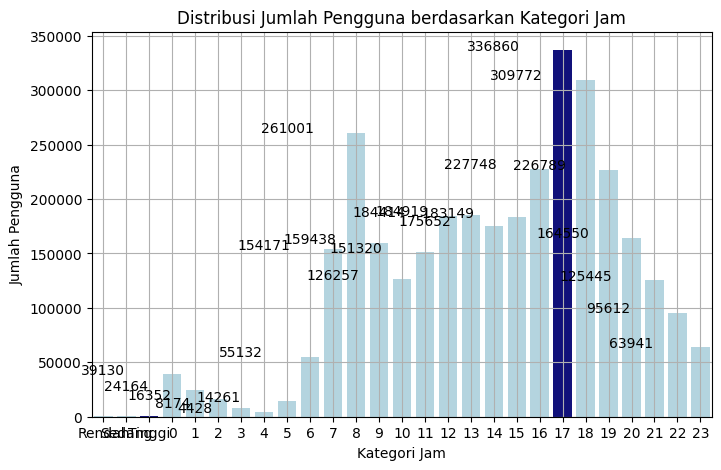

In [26]:
user_distribution = {
    'Rendah': sum(day_df_cleaned['cnt'] <= day_df_cleaned['cnt'].quantile(0.33)),
    'Sedang': sum((day_df_cleaned['cnt'] > day_df_cleaned['cnt'].quantile(0.33)) & 
                   (day_df_cleaned['cnt'] <= day_df_cleaned['cnt'].quantile(0.66))),
    'Tinggi': sum(day_df_cleaned['cnt'] > day_df_cleaned['cnt'].quantile(0.66))
}

plt.figure(figsize=(8, 5))
user_categories = list(user_distribution.keys())
user_counts = list(user_distribution.values())
colors = ['lightblue' if count < max(user_counts) else 'darkblue' for count in user_counts]

# Menggunakan hue untuk memberikan warna kategori
sns.barplot(x=user_categories, y=user_counts, palette=colors, hue=user_categories, legend=False)

# 2. Visualisasi Kategori Jam
# Membuat kategori jam berdasarkan distribusi 'hr' dari dataset 'hour_df_cleaned'
hour_distribution = hour_df_cleaned.groupby('hr')['cnt'].sum().to_dict()

# Menggunakan hue untuk memberikan warna kategori
sns.barplot(x=hour_categories, y=hour_counts, palette=colors_hour, hue=hour_categories, legend=False)
plt.title('Distribusi Jumlah Pengguna berdasarkan Kategori Jam')
plt.xlabel('Kategori Jam')
plt.ylabel('Jumlah Pengguna')
plt.grid()

# Menambahkan anotasi pada balok
for index, count in enumerate(hour_counts):
    plt.text(index, count, count, color='black', ha='center')
plt.show()


**Insight**
**visualisasi kategori jam:**
- Analisis distribusi pengguna berdasarkan kategori jam memperlihatkan pola yang jelas dalam penggunaan sepeda. Jam-jam tertentu menunjukkan jumlah pengguna yang lebih tinggi, menandakan waktu-waktu sibuk di mana penyewaan sepeda meningkat.
- Penggunaan warna untuk menandakan jam dengan jumlah tertinggi juga memberikan gambaran yang baik tentang waktu-waktu puncak, membantu dalam pengambilan keputusan mengenai penempatan sepeda dan manajemen armada.
- Dengan anotasi pada balok, kita dapat dengan cepat melihat jumlah pengguna untuk setiap kategori jam, memberikan informasi yang jelas tentang kapan penyewaan paling banyak terjadi.

## Conclusion

**Pertanyaan 1: Bagaimana pengaruh musim terhadap jumlah total pengguna (cnt) yang menggunakan sepeda?**
- Dari analisis yang dilakukan, terlihat bahwa musim memiliki dampak yang signifikan terhadap jumlah total pengguna sepeda. **Musim panas** mencatat rata-rata jumlah penyewa yang tertinggi, dengan angka yang menunjukkan aktivitas penyewaan yang sangat tinggi pada hari-hari cerah dan hangat. Hal ini dapat dihubungkan dengan meningkatnya minat masyarakat untuk berolahraga dan bersantai di luar ruangan selama cuaca yang baik.
- **Musim semi** juga menunjukkan rata-rata jumlah penyewa yang cukup tinggi, 
- **Musim gugur** menunjukkan penurunan jumlah penyewa dibandingkan dengan dua musim sebelumnya, tetapi masih mempertahankan tingkat penyewaan yang layak. 
- Sebaliknya, **musim dingin** mencatat jumlah pengguna terendah. Suhu yang sangat dingin, kemungkinan salju, dan kondisi cuaca yang tidak nyaman membuat orang cenderung memilih moda transportasi lain.

**Pertanyaan 2: Apa pola penggunaan sepeda berdasarkan jam dalam sehari, dan bagaimana faktor cuaca mempengaruhi jumlah pengguna pada jam-jam tertentu?**
- Analisis pola penggunaan sepeda berdasarkan jam dalam sehari menunjukkan bahwa jam-jam sibuk terjadi terutama antara pagi dan sore. Peningkatan signifikan dalam jumlah penyewa pada jam-jam ini konsisten dengan pola aktivitas harian masyarakat, di mana banyak orang menggunakan sepeda untuk pergi bekerja, sekolah, atau aktivitas luar ruangan lainnya.
- Jam puncak pagi dan sore mencerminkan pola perjalanan yang umum, di mana pengguna lebih cenderung menyewa sepeda saat menuju atau pulang dari pekerjaan. Analisis ini sangat penting untuk memahami kapan permintaan terhadap penyewaan sepeda berada di puncaknya.
